Proyecto 13

In [50]:
#Librerias utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [81]:
#LEcturas de la informacion
data=pd.read_csv('./gym_churn_us.csv')

In [52]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [53]:
data.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

No tenemos datos ausentes, aproximadamente la mitad de los usuarios son hombres o mujeres (caso 50%) en los que el 84% de los usuarios viven o trabajan cerca del gimnasio, solo el 30% va acompañado. con una edad promedio de 29 años.

In [54]:
data_cancelacion=data.groupby('Churn').mean().reindex()
print(data_cancelacion)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Se puede ver en la tabla de las personas que cancelan su menbresia o estancia en el gimnasio son personas mas jovenes, ademas suelen ir en su mayoria solas al gimasio, al parecer los que desertan tienen plan de 3 meses.

In [55]:
cancelacion=data[data['Churn']==1]
quedaron=data[data['Churn']==0]

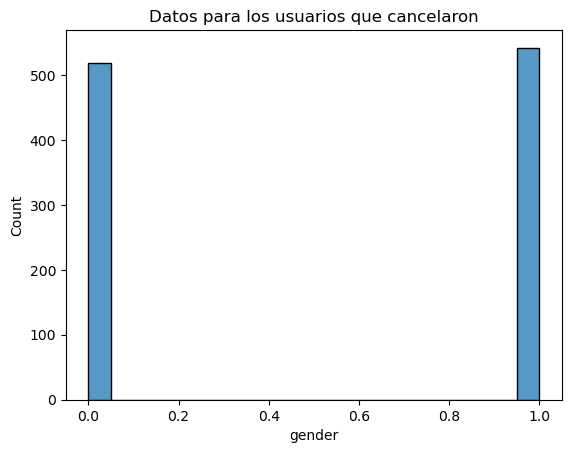

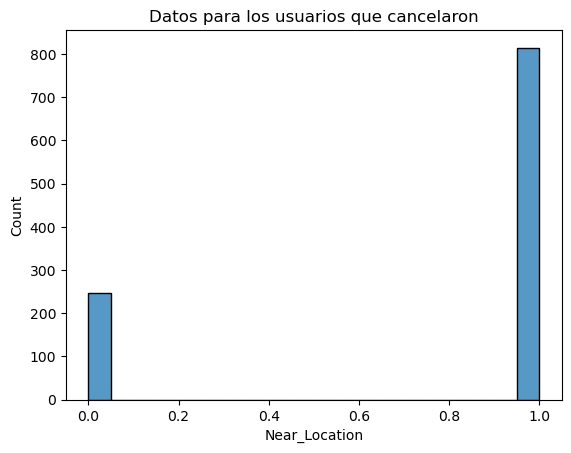

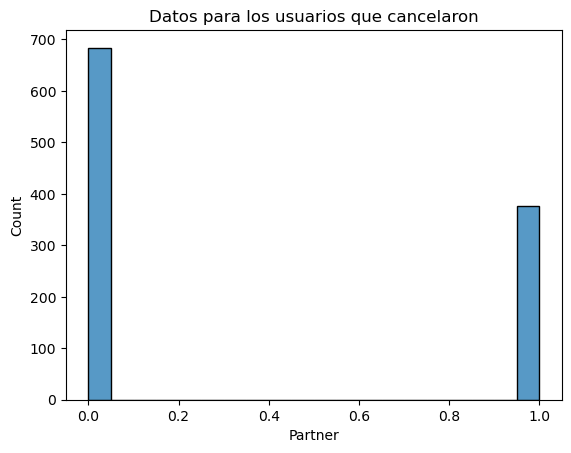

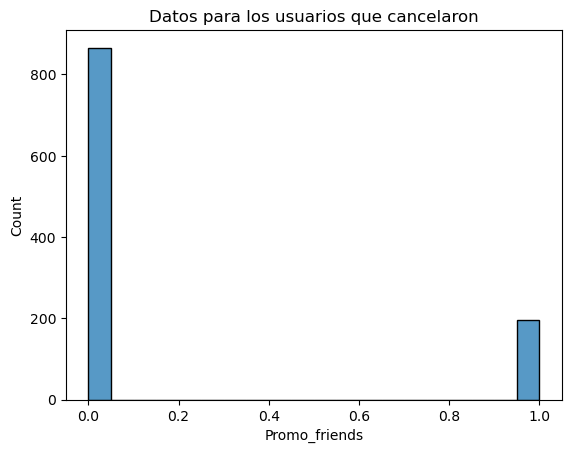

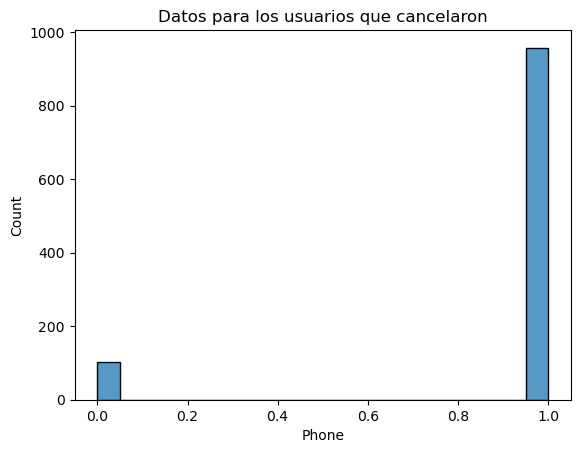

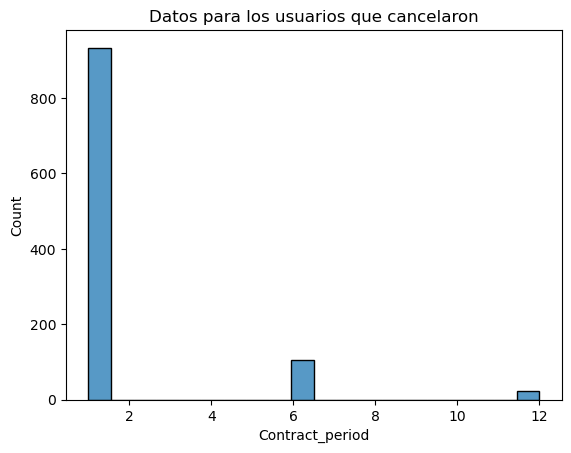

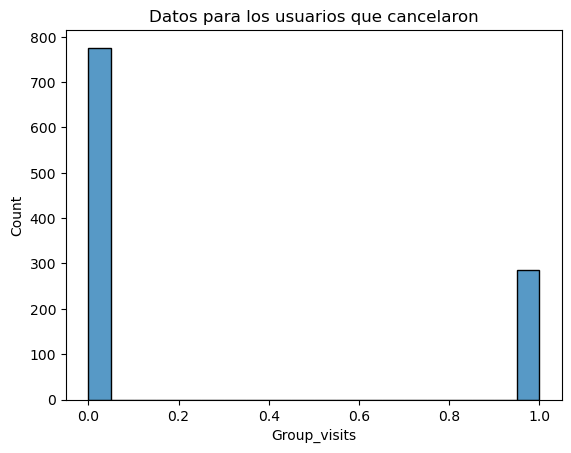

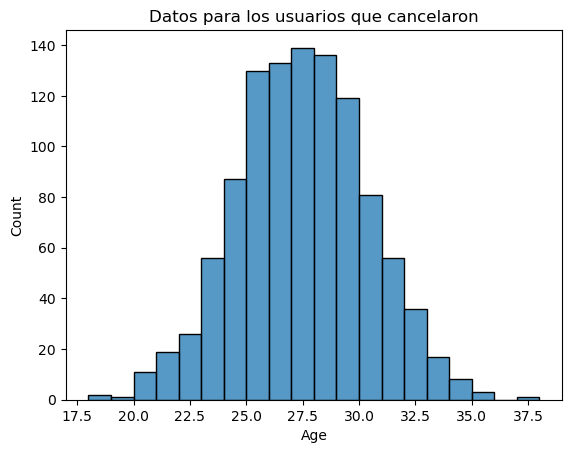

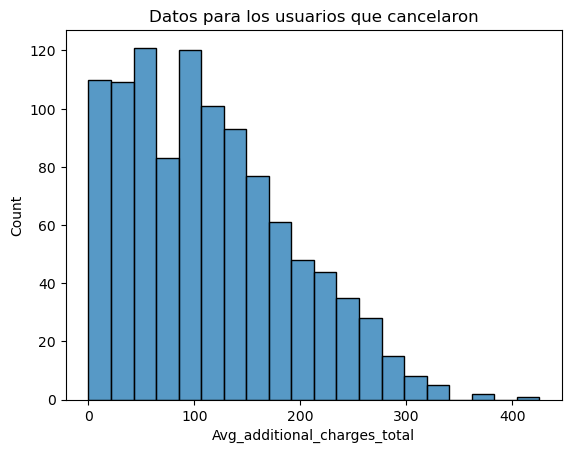

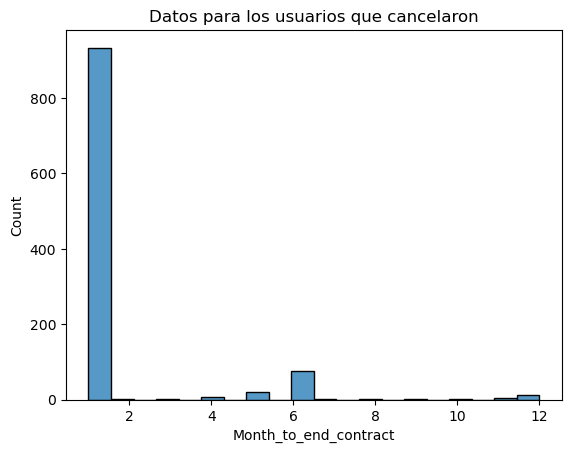

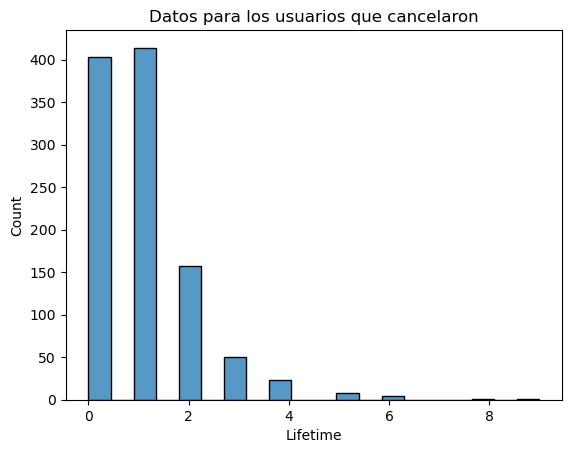

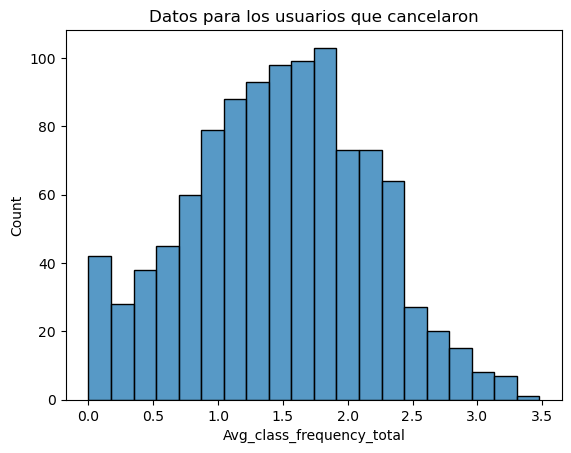

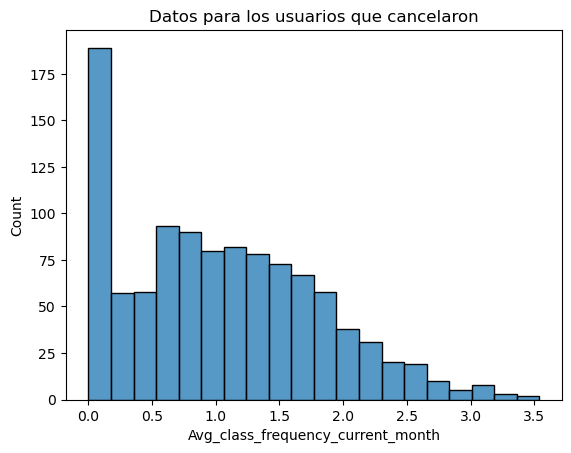

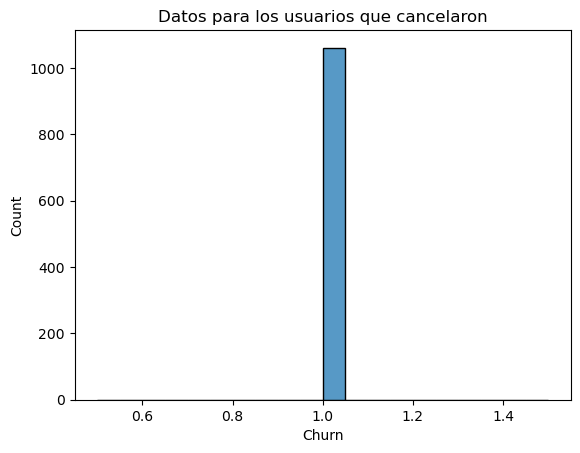

In [56]:
for col in cancelacion.columns:
    sns.histplot(x=cancelacion[col], bins=20)
    plt.title('Datos para los usuarios que cancelaron')
    plt.show()

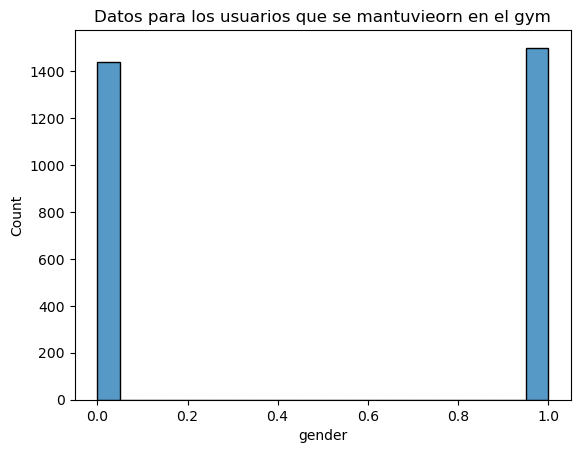

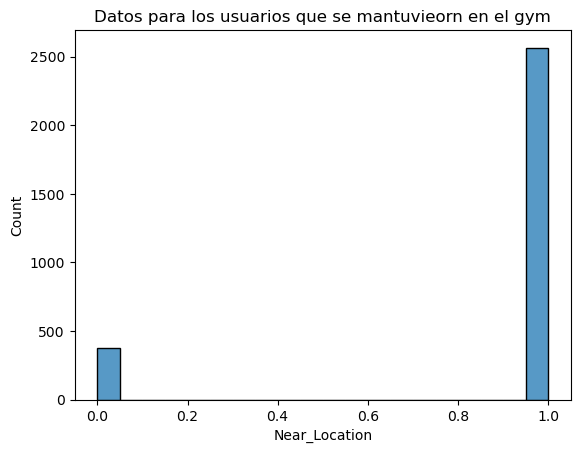

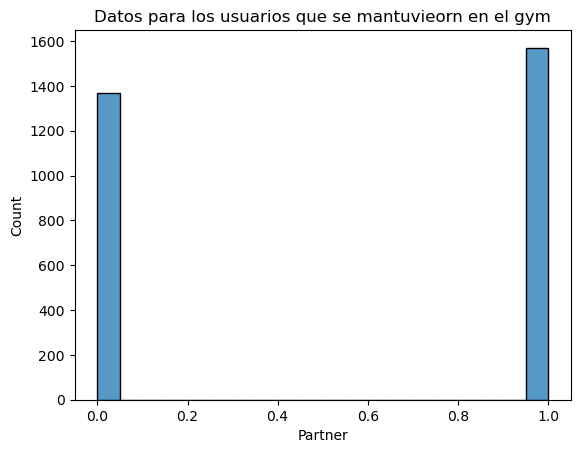

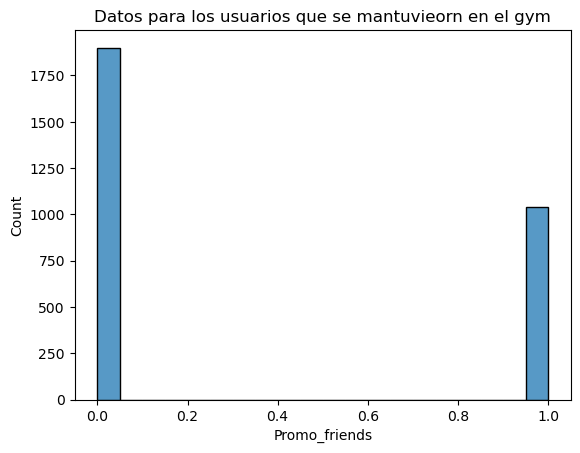

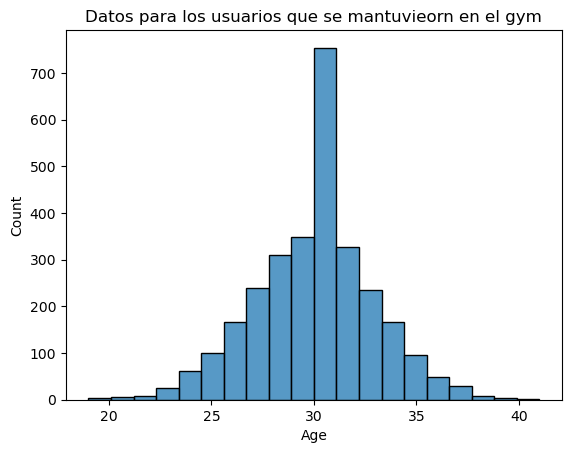

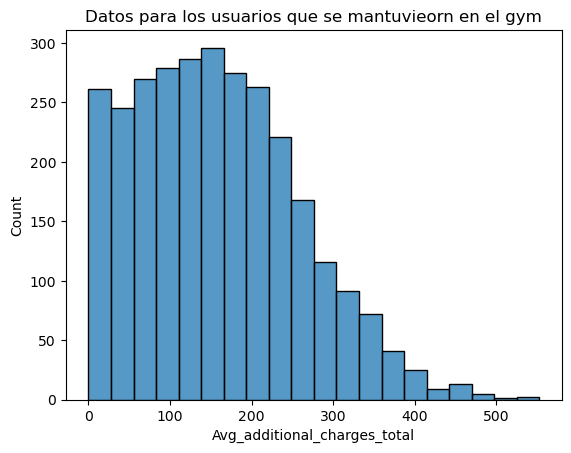

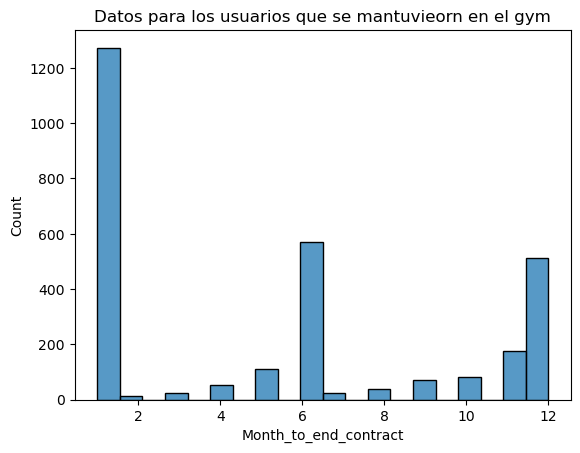

In [57]:
for col in quedaron.columns:
    sns.histplot(x=quedaron[col], bins=20)
    plt.title('Datos para los usuarios que se mantuvieorn en el gym')
    plt.show()

In [58]:
data.corr()

gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.045561   
Churn                              0.000708      -0.128098 -0.157986   

                                   Promo_friends     Phone  Contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
Near_Location                           0.210964 -0.015763         0.150233   
Partner                                 0.451960  0.009970         0.306166   
Promo_friends                           1.000000  0.001982         0.244552   
Phone                                   0.001982  1.000000        -0.006893   
Contract_period                         0.244552 -0.006893         1.000000   
Group_visits                            0.120170 -0.010099         0.169991   
Age                                     0.050113 -0.011403         0.138249   
Avg_additional_charges_total            0.036898  0.009279         0.111445   
Month_to_end_contract                   0.239553 -0.011196         0.973064   
Lifetime                                0.072721 -0.018801         0.170725   
Avg_class_frequency_total               0.028063  0.008340         0.096211   
Avg_class_frequency_current_month       0.053768  0.013375         0.159407   
Churn                                  -0.162233 -0.001177        -0.389984   

                                   Group_visits       Age  \
gender                                 0.017879  0.013807   
Near_Location                          0.154728  0.058358   
Partner                                0.022710  0.047480   
Promo_friends                          0.120170  0.050113   
Phone                                 -0.010099 -0.011403   
Contract_period                        0.169991  0.138249   
Group_visits                           1.000000  0.080934   
Age                                    0.080934  1.000000   
Avg_additional_charges_total           0.032079  0.080240   
Month_to_end_contract                  0.163703  0.134511   
Lifetime                               0.075853  0.164693   
Avg_class_frequency_total              0.056695  0.119953   
Avg_class_frequency_current_month      0.075923  0.183095   
Churn                                 -0.175325 -0.404735   

                                   Avg_additional_charges_total  \
gender                                                -0.009334   
Near_Location                                          0.040761   
Partner                                                0.022941   
Promo_friends                                          0.036898   
Phone                                                  0.009279   
Contract_period                                        0.111445   
Group_visits                                           0.032079   
Age                                                    0.080240   
Avg_additional_charges_total                           1.000000   
Month_to_end_contract                                  0.113958   
Lifetime                                               0.079028   
Avg_class_frequency_total                         

de la tabla de correlacion podemos ver que en general la ubiucacion de las instalaciones del gimnasio a donde se trabajo o vive influye en las visitas con acompañante y en los periodos que se tienen de viita al gimnasio, vemos que para la cancelacion influyen las caracteristicas como el periodo del contrato, la edad.

PASO 3

In [59]:
X=data.drop(columns='Churn')
y=data['Churn']
scaler=StandardScaler()
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) 
X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.fit_transform(X_test)


In [60]:
model1=LogisticRegression(random_state=0)
model1.fit(X_train_st,y_train)
prediction1=model1.predict(X_test_st)
model2=RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(X_train_st,y_train)
prediction2=model2.predict(X_test_st)

In [61]:
def print_all_metrics(y_true, y_pred, title='Meticas de Clasificacion'):
    print(title)
    print('\t Accuracy: {:.2f}'.format(accuracy_score(y_true,y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [62]:
print('LogisticRegression')
print_all_metrics(y_test,prediction1)

print('RandomTreeClassifier')
print_all_metrics(y_test,prediction2)

LogisticRegression
Meticas de Clasificacion
	 Accuracy: 0.92
	Precision: 0.82
	Recall: 0.84
RandomTreeClassifier
Meticas de Clasificacion
	 Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


Debido a que lo que nos interesa es conocer la cantidad de usuarios que se marchan el mes siguiente seria mejor opcion usar el Random Forest Classifier.

PASO 4


In [63]:
scaler=StandardScaler()
x_sc = scaler.fit_transform(data.drop(columns = ['Churn']))
print(x_sc)
linked=linkage(x_sc)
print(linked)

[[ 0.97970588  0.42788074  1.02686062 ... -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   ...  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 ... -0.46008079 -0.02049263
  -0.02901851]
 ...
 [ 0.97970588  0.42788074  1.02686062 ... -0.46008079  0.93313947
   1.01103141]
 [-1.0207145   0.42788074  1.02686062 ... -0.19332863 -0.25604937
  -0.16225246]
 [ 0.97970588 -2.33709981  1.02686062 ... -0.72683295 -0.79947418
  -0.69509885]]
[[9.70000000e+01 3.22200000e+03 1.00990653e-01 2.00000000e+00]
 [2.61000000e+02 3.17900000e+03 1.22634574e-01 2.00000000e+00]
 [8.90000000e+02 1.75000000e+03 1.28123291e-01 2.00000000e+00]
 ...
 [1.17400000e+03 7.99500000e+03 3.55689446e+00 3.99800000e+03]
 [3.09500000e+03 7.99600000e+03 3.57587468e+00 3.99900000e+03]
 [9.15000000e+02 7.99700000e+03 3.99959488e+00 4.00000000e+03]]


In [64]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title("Dendrograma")
plt.show()

In [65]:
#Utilizando Kmeans
km = KMeans(n_clusters=5)
labels = km.fit_predict(x_sc)
data['cluster_km'] = labels
data.groupby(['cluster_km']).mean()

gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_km                                                               
0           0.556992       0.978848  0.357227       0.237368  0.998825   
1           0.496063       0.000000  0.460630       0.078740  1.000000   
2           0.488746       1.000000  0.350482       0.235531  1.000000   
3           0.500000       0.960474  0.782609       0.574111  1.000000   
4           0.522078       0.862338  0.470130       0.306494  0.000000   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  2.599295      0.475911  30.117509   
1                  2.375984      0.218504  28.486220   
2                  1.962219      0.338424  28.147910   
3                 10.891304      0.541502  29.979249   
4                  4.787013      0.425974  29.301299   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             163.000782               2.397180  5.037603   
1                             135.544499               2.222441  2.811024   
2                             130.191088               1.872186  2.332797   
3                             160.892516               9.950593  4.714427   
4                             143.957664               4.475325  3.924675   

            Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster_km                                                                 
0                            2.817751                           2.815594   
1                            1.666510                           1.485248   
2                            1.243408                           1.005032   
3                            1.989730                           1.982775   
4                            1.847220                           1.716369   

               Churn  
cluster_km            
0           0.066980  
1           0.440945  
2           0.521704  
3           0.027668  
4           0.267532

Lo que se puede observar es que el cluester 2 tiene la tasa de cancelacion mayor, en el cluster1 se tiene un valor de 0 para Near_Location, mientras que en Cluster 2 se tiene 1, el mayor numero de meses que se tiene en contrato es de 10meses en promedio, minetras que el mas bajo es de casi 2 meses. llama la atencion que los meses para terminar el contrato del cluster 3 es de 9 meses mientras qeu ese mismo cluester lleva 10 meses en contrato, lo cual da la impresion de ser el grupo mas dedicado al gimnasio.

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn', 'cluster_km'],
      dtype='object')


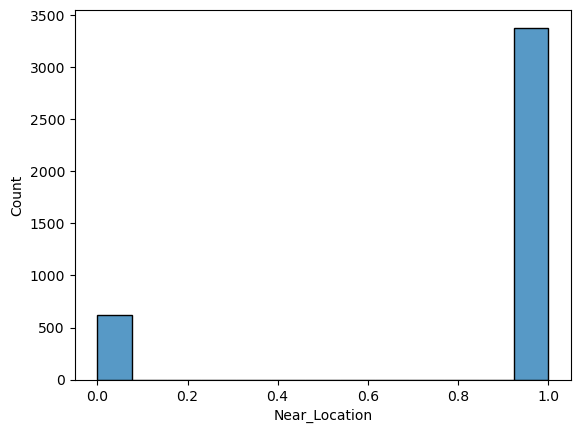

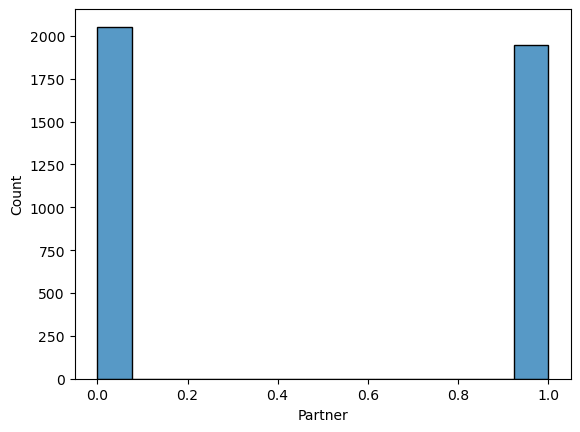

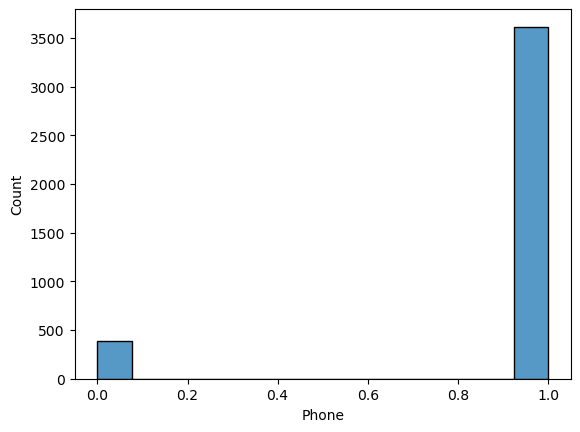

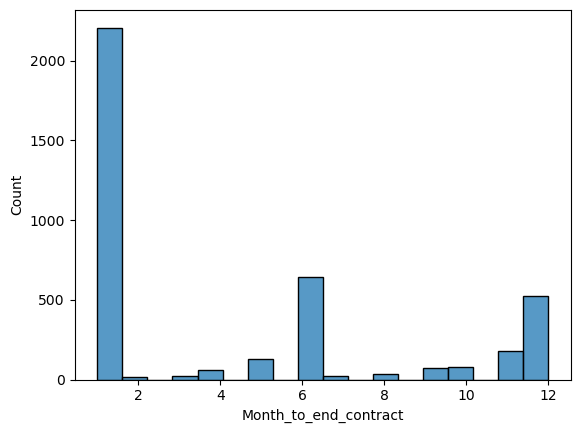

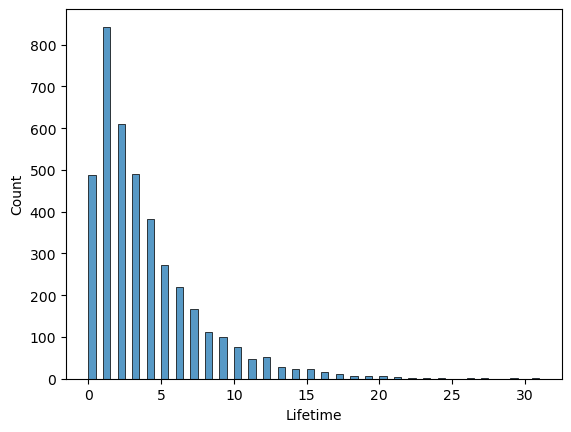

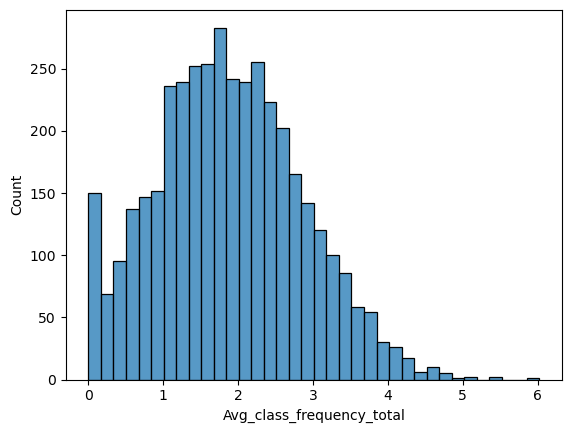

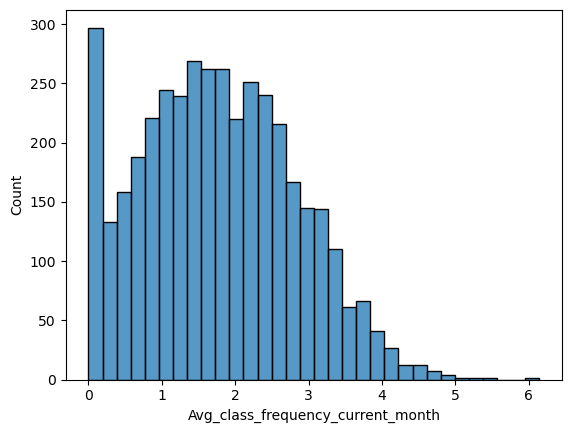

In [76]:
print(data.columns)
for col in data.drop('Churn', axis=1).columns:
    sns.histplot(data,x=data[col])
    plt.show()

In [80]:
tasa_cancelacion = data.groupby('cluster_km')['Churn'].mean().reset_index(name='Tasa_de_Cancelación')
print(tasa_cancelacion)

   cluster_km  Tasa_de_Cancelación
0           0             0.066980
1           1             0.440945
2           2             0.521704
3           3             0.027668
4           4             0.267532


De los datos de la tasa de cancelacion muestran que el cluster mas leal es el numero 3 , mientras que el que tiene mayor cancelacion es el cluster 2 y despues el 1, todos difieren aunque el 1 y 2 se parecen.

Conclusiones

Las visitas promedio de los clientes que cancelan son baja durante la semana en el mes en curso, los usuarios que se mantienen tienen una edad aproximada de los 30 años mientras que las personas que cancelan la mayoria tienen 27 años, los usurios que cancelan normalmente tienen el plan mas bajo, lo ideal sera lanzar una promocion para tratar que la mayor cantidad de clientes puedan tener un plan de 6 meses o un año, ademas la gran mayoria de los que cancelaron no son 'socios' o empleados de compañias asociadas, es muy probable que los que se mantienen en el gimnasio sea por los descuentos que tienen, 